# Proyek Analisis Data: Bike Sharing
- **Nama:** Shafa Nabilah Hanin
- **Email:** m004d4kx2386@bangkit.academy
- **ID Dicoding:** m004d4kx2386

## Menentukan Pertanyaan Bisnis

- How does bike rental demand vary by month and weather condition, and is there a difference in rental patterns between weekdays and weekends?
- How does bike rental demand vary by season?

## Import Semua Packages/Library yang Digunakan

In [67]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

`day_df` is assumed as DataFrame of day data from day.csv file. The command below will show the first 5 rows of DataFrame `day_df`.

In [68]:
day_df = pd.read_csv("/content/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


`hour_df` is assumed as DataFrame of hour data from hour.csv file. The command below will show the first 5 rows of DataFrame `hour_df`

In [69]:
hour_df = pd.read_csv("/content/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Check the data type for every columns in day_df using `info()` method.

In [70]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


There's a in 'dteday' column data type. It's supposed to be datetime, not object. We need to change it later in data cleaning.

Then, check if there's any missing values using the command below.

In [71]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There's no missing values.

Check the data duplication using this command below

In [72]:
print("Duplication : ",day_df.duplicated().sum())
day_df.describe()

Duplication :  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


As we can see that there's no problem in data duplication.

Check the data type for every columns in hour_df using `info()` method.

In [73]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


There's a in 'dteday' column data type. It's supposed to be datetime, not object. We need to change it later in data cleaning.

Check if there's any missing values in `hour_df`

In [74]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There's no missing values.

Check the data duplication using the command below.

In [75]:
print("Duplication: ",hour_df.duplicated().sum())
hour_df.describe()

Duplication:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


There's no duplication data

### Cleaning Data

Change the wrong data type for 'dteday' column on `date_df` and `hour_df` to datetime

In [76]:
day_df['dteday'] = pd.to_datetime(day_df["dteday"])
print(day_df['dteday'].dtype)

datetime64[ns]


In [77]:
hour_df['dteday'] = pd.to_datetime(hour_df["dteday"])
print(hour_df['dteday'].dtype)

datetime64[ns]


## Exploratory Data Analysis (EDA)

### Explore ...

For the first question, we need to know the difference of the bike rental demand by the day type (weekday and weekend) vary by month and weather condition.
Calculate the total bike rental count aggregrated by month and weather, and day type (weekdays and weekend)

In [85]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Extract month, weather condition, and day type (weekday/weekend)
day_df['month'] = day_df['dteday'].dt.month
day_df['month'] = day_df['month'].apply(lambda x: month_order[x - 1]) # Adjust the index by substracting to 1
# Convert 'month' column to categorical data with custom order
day_df['month'] = pd.Categorical(day_df['month'], categories=month_order, ordered=True)
# Map day of the week to 'Weekend' or 'Weekday'
day_df['day_type'] = day_df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group the data by month, weather condition, and day type
grouped_data = day_df.groupby(['month', 'weathersit', 'day_type'])['cnt'].sum().reset_index()
grouped_df = pd.DataFrame(grouped_data)

# Print the DataFrame
print(grouped_df)


   month  weathersit day_type    cnt
0    Jan           1  Weekday  63999
1    Jan           1  Weekend  23392
2    Jan           2  Weekday  33247
3    Jan           2  Weekend  13789
4    Jan           3  Weekday    506
..   ...         ...      ...    ...
67   Dec           1  Weekend  35475
68   Dec           2  Weekday  65042
69   Dec           2  Weekend  30156
70   Dec           3  Weekday   3740
71   Dec           3  Weekend      0

[72 rows x 4 columns]


The second question is to know the total bike rental count in every season.

In [79]:
# Calculate total bike rental count by season
seasonal_rental_count = hour_df.groupby('season')['cnt'].sum()
seasonal_rental_count_df = seasonal_rental_count.to_frame().reset_index()
print(seasonal_rental_count_df)

   season      cnt
0       1   471348
1       2   918589
2       3  1061129
3       4   841613


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Visualize the data with line plot using the command below.

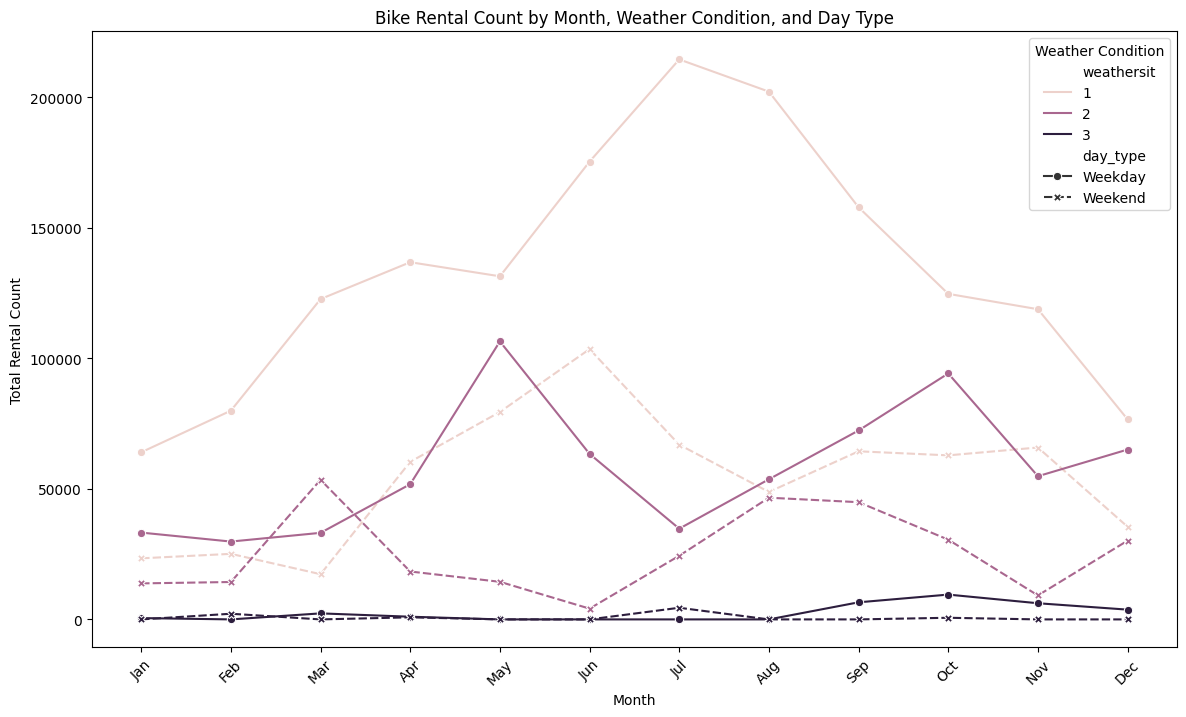

In [80]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_data, x='month', y='cnt', hue='weathersit', hue_order=[1, 2, 3, 4], style='day_type', markers=True)
plt.title('Bike Rental Count by Month, Weather Condition, and Day Type')
plt.xlabel('Month')
plt.ylabel('Total Rental Count')
plt.xticks(rotation=45)
plt.legend(title='Weather Condition')
plt.show()


For the advanced analysis technique, use RFM Analysis to understand how bike rental demand varies by month and weather condition, and to identify differences in rental patterns between weekdays and weekends.
1. Recency Analysis: Calculate the recency of bike rentals by determining the most recent rental date
2. Frequency Analysis: Calculate the frequency of bike rentals by counting the number of rental transactions within a specific time period
3. Monetary Analysis: Calculate the monetary value of bike rentals by aggregating the total rental count or revenue for each month, weather condition, and day type

Compare the RFM metrics (recency, frequency, monetary) between weekdays and weekends

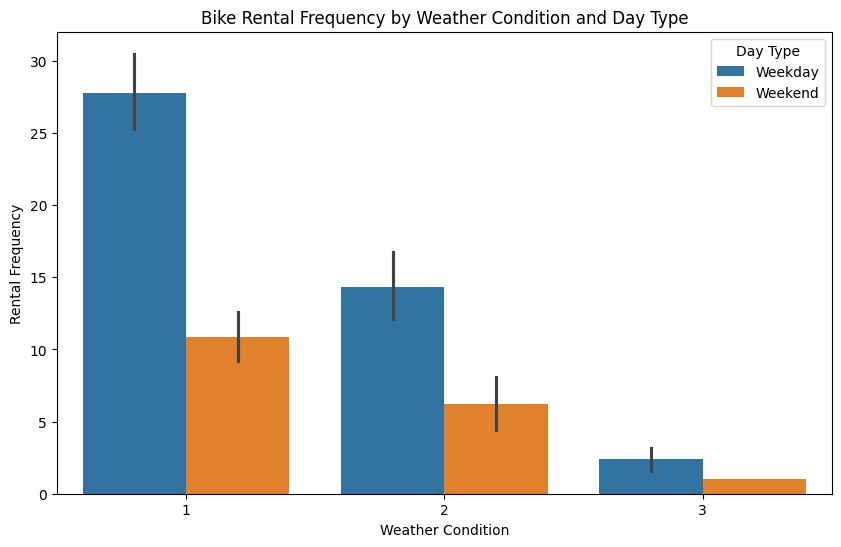

In [81]:
# Step 1: Recency Analysis
latest_dteday = day_df['dteday'].max()
day_df['recency'] = (latest_dteday - day_df['dteday']).dt.days

# Step 2: Frequency Analysis
monthly_rental_frequency = day_df.groupby([day_df['dteday'].dt.month, 'weathersit', 'day_type']).size().reset_index(name='frequency')

# Step 3: Monetary Analysis
monthly_rental_count = day_df.groupby([day_df['dteday'].dt.month, 'weathersit', 'day_type']).size().reset_index(name='rental_count')

# Step 4: Differences Between Weekdays and Weekends
weekday_data = day_df[day_df['day_type'] == 'Weekday']
weekend_data = day_df[day_df['day_type'] == 'Weekend']

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_rental_frequency, x='weathersit', y='frequency', hue='day_type')
plt.title('Bike Rental Frequency by Weather Condition and Day Type')
plt.xlabel('Weather Condition')
plt.ylabel('Rental Frequency')
plt.legend(title='Day Type')
plt.show()


From the analysis, we could see that the bike rental has higher demand on warmer months on the second to third quarter of the year and pleasent weather such as clear skies or cloudy. Comparing from the days, people would like to rent bike on weekdays more than on weekends.

### Pertanyaan 2:

Visualize the data using bar plot.

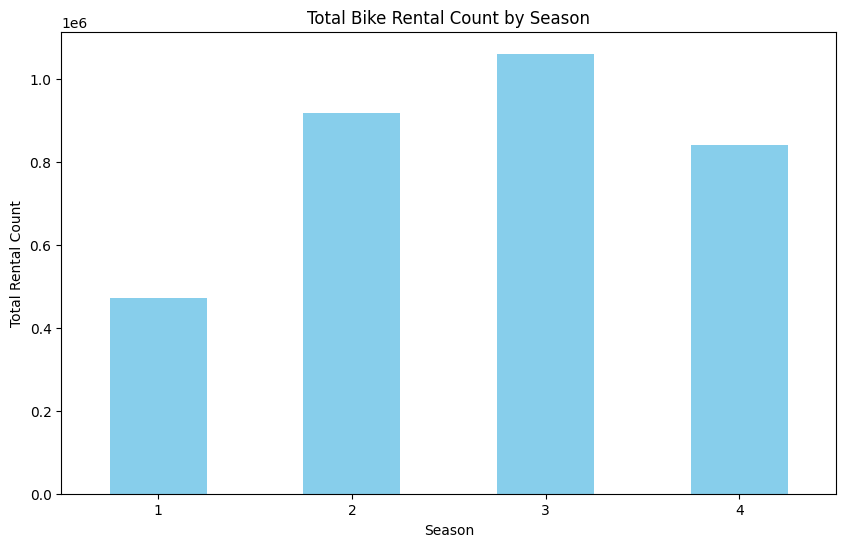

In [82]:
plt.figure(figsize=(10, 6))
seasonal_rental_count.plot(kind='bar', color='skyblue')
plt.title('Total Bike Rental Count by Season')
plt.xlabel('Season')
plt.ylabel('Total Rental Count')
plt.xticks(rotation=0)
plt.show()

For the advanced analysis technique, we use Clustering with the 'season' column from the 'hour_df' dataset. K-means clustering applied to group similar periods of bike rental demand based on their rental counts and seasons.
1. Select relevant features for clustering (rental count and season)
2. Standarize the features
3. Define the number of cluster (it's 4, because there are 4 seasons)
4. Apply K-Means Clustering
5. Analyze the cluster

In [83]:
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")

# Select relevant features for clustering (e.g., rental counts and season)
X = hour_df[['cnt', 'season']]

# Standardize the features (optional but recommended for K-means)
X_normalized = (X - X.mean()) / X.std()

# Define the number of clusters (e.g., based on the number of seasons)
n_clusters = 4  # Assuming there are four seasons

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_normalized)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

# Add cluster labels to the dataset
hour_df['cluster'] = cluster_labels

# Analyze the clusters
cluster_counts = hour_df.groupby(['cluster']).mean(numeric_only=True)['cnt']
print("Average rental counts by cluster:")
print(cluster_counts)


Average rental counts by cluster:
cluster
0    560.240787
1     77.927415
2    316.961284
3    115.302843
Name: cnt, dtype: float64


It seems from the analysis that the most demand bike rental happens on Spring season with showing the largest avaerage rental counts.

## Conclusion

- The bike rental has high demand on warmer months with clear weather and most people rent it on weekdays
- The bike rental has more demand on Spring season

In [90]:
all_df = pd.concat([hour_df, day_df, grouped_df, seasonal_rental_count_df], axis=0)
all_df.to_csv('main_data.csv', index=False)